作业2：

1.思考感知机模型假设空间是什么？模型复杂度体现在哪里？打卡进行文字说明。

2.已知训练数据集D，其正实例点是x1=(3,3)T,x2=(4,3)T，负实例点是x3=(1,1)T:

(1) 用python 自编程实现感知机模型，对训练数据集进行分类，并对比误分类点选择次序不同对最终结果的影响。可采用函数式编程或面向对象的编程。

(2)试调用sklearn.linear_model 的Perceptron模块，对训练数据集进行分类，并对比不同学习率h对模型学习速度及结果的影响。

(3)附加题：
 对比传统感知机算法及其对偶形式的运行速度。

w=[1. 1.], b=-3, n=7


ValueError: operands could not be broadcast together with shapes (2,) (50,) 

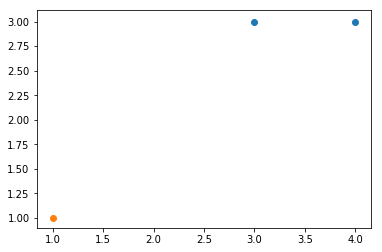

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class perceptron:
    #初始化
    def __init__(self, X, y, w, b, yita=1):
        self.X = X
        self.y = y
        self.w = w
        self.b = b
        self.yita = yita
        self.n = 0
    def fit(self):
        num = len(self.X)
        flag = 1
        while flag:
            flag = 0
            for i in range(num):
                if self.y[i] * (self.w.dot(self.X[i]) + self.b) <= 0:
                    self.n += 1
                    self.w += self.yita * self.y[i] * self.X[i]
                    self.b += self.yita * self.y[i]
                    flag = 1
                    
    def plot(self):
        plt.scatter(self.X[:2,0],self.X[:2,1],cmap = 'bo',label = '1')
        plt.scatter(self.X[2,0],self.X[2,1],cmap = 'ro',label = '-1')
        X_axis=np.linspace(0,4)
        y_ = -(self.w[0] * X_axis + self.b) / self.w[1]
        plt.plot(X_axis,y_,'g',label = 'split line')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid()
        plt.legend()
        plt.show()
                
X = np.array([[3,3],[4,3],[1,1]])
y = np.array([1,1,-1])
b=0
yita = 1
w = np.zeros(X.shape[1])
Perceptron_model = perceptron(X,y,w,b,yita)
Perceptron_model.fit()
print("w={}, b={}, n={}".format(Perceptron_model.w,Perceptron_model.b,Perceptron_model.n))
Perceptron_model.plot()

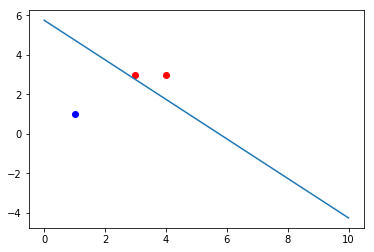

In [4]:
import numpy as np
import matplotlib.pyplot as plt
p_x = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])
plt.figure()
for i in range(len(p_x)):
    if y[i] == 1:
        plt.plot(p_x[i][0], p_x[i][1], 'ro')
    else:
        plt.plot(p_x[i][0], p_x[i][1], 'bo')
 
w = np.array([0, 0])
b = 0
delta = 1
 
for i in range(100):
    choice = -1
    for j in range(len(p_x)):
        if y[j] != np.sign(np.dot(w, p_x[0]) + b):
            choice = j
            break
    if choice == -1:
        break
    w = w + delta * y[choice]*p_x[choice]
    b = b + delta * y[choice]
 
line_x = [0, 10]
line_y = [0, 0]
 
for i in range(len(line_x)):
    line_y[i] = (-w[0] * line_x[i]- b)/w[1]
 
plt.plot(line_x, line_y)